## Creating helper functions

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-08-19 14:23:27--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.02s   

2024-08-19 14:23:28 (583 KB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
# IMport helper functions we are going to use in this notebook
from helper_functions import unzip_data, walk_through_dir, create_tensorboard_callback, plot_loss_curves

## Let's get some data
Pretrained model on [Keras](https://keras.io/api/applications/) website or [Tensorflow](https://www.tensorflow.org/api_docs/python/tf/keras/applications) website

In [10]:
# Download 10 food classes 10 percent
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip


--2024-08-19 15:46:41--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.21.207, 172.253.124.207, 74.125.138.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.21.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

             10_foo   4%[                    ]   7.42M   822KB/s    eta 3m 34s ^C


In [11]:
unzip_data('10_food_classes_10_percent.zip')

In [13]:
walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/tes

In [239]:
# Creating directories pathes
train_dir_10_percent='10_food_classes_10_percent/train'
test_dir='10_food_classes_10_percent/test'

In [17]:
# Creating data sets
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

BATCH_SIZE=32
IMAGE_SIZE=(224,224)

train_data_10_percent=image_dataset_from_directory(directory=train_dir_10_percent,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMAGE_SIZE,
                                                  label_mode='categorical')

test_data=image_dataset_from_directory(directory=test_dir,
                                      batch_size=BATCH_SIZE,
                                      image_size=IMAGE_SIZE,
                                      label_mode='categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


2024-08-19 16:07:50.874950: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [19]:
train_data_10_percent

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [21]:
len(train_data_10_percent)

24

In [22]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [43]:
i=0

for images, labels in train_data_10_percent.take(len(train_data_10_percent)):
    i+=1
    print(i,images.shape, labels.shape)

1 (32, 224, 224, 3) (32, 10)
2 (32, 224, 224, 3) (32, 10)
3 (32, 224, 224, 3) (32, 10)
4 (32, 224, 224, 3) (32, 10)
5 (32, 224, 224, 3) (32, 10)
6 (32, 224, 224, 3) (32, 10)
7 (32, 224, 224, 3) (32, 10)
8 (32, 224, 224, 3) (32, 10)
9 (32, 224, 224, 3) (32, 10)
10 (32, 224, 224, 3) (32, 10)
11 (32, 224, 224, 3) (32, 10)
12 (32, 224, 224, 3) (32, 10)
13 (32, 224, 224, 3) (32, 10)
14 (32, 224, 224, 3) (32, 10)
15 (32, 224, 224, 3) (32, 10)
16 (32, 224, 224, 3) (32, 10)
17 (32, 224, 224, 3) (32, 10)
18 (32, 224, 224, 3) (32, 10)
19 (32, 224, 224, 3) (32, 10)
20 (32, 224, 224, 3) (32, 10)
21 (32, 224, 224, 3) (32, 10)
22 (32, 224, 224, 3) (32, 10)
23 (32, 224, 224, 3) (32, 10)
24 (14, 224, 224, 3) (14, 10)


In [42]:
len(train_data_10_percent)

24

In [84]:
for images, labels in train_data_10_percent.take(1):
    print(images.shape, labels)

(32, 224, 224, 3) tf.Tensor(
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 

## Model 0: Building a transfer learning feature extraction model using the Keras Functional API

The sequential API is straight-forward but functional API is more flexible

> model_0:
> - Data: 10%
> - Prepeocessing: None
> - Model: Feature Extractor

In [115]:
# 1 Create base model
base_model=tf.keras.applications.EfficientNetB0(include_top=False)

# 2 Freeze the base model (so underlying pre-trained paterns aren't updeted during training)
base_model.trainable=False

# 3 Create inputs into our model
inputs= tf.keras.layers.Input(shape=(224,224,3), name='input_layer')

# 4 If using a model like REsNet50v2 you will need to normalize inputs. you don't have to for EfficientNet
#x= tf.keras.layers.Rescaling(1/255.)(inputs)

# 5 Pass the inputs to the base model
x= base_model(inputs)
print(f'Shape after passing inputs through base model: {x.shape}')

# 6 Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations )
x= tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x) # Condensed feature vector
print(f'Shape after GlobalAveragePolling2D: {x.shape}')

# 7 Create the output activation layer
outputs= tf.keras.layers.Dense(10, activation='softmax', name='output_layer')(x)

# 8 Combine the inputs with the outputs into a model
model_0= tf.keras.Model(inputs,outputs)

# 9 Compile the model
model_0.compile(optimizer=tf.keras.optimizers.Adam(),
               loss=tf.keras.losses.CategoricalCrossentropy(),
               metrics=['accuracy'])

# 10 Fit the model and save it's history
history_model_0= model_0.fit(train_data_10_percent,
                            #steps_per_epoch=len(train_data_10_percent),
                            epochs=5,
                            validation_data=test_data,
                            validation_steps=int(0.25 * len(test_data)),
                            callbacks=[create_tensorboard_callback(dir_name='transfer_learning',
                                                                  experiment_name='model_0')])



Shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after GlobalAveragePolling2D: (None, 1280)
Saving TensorBoard log files to: transfer_learning/model_0/20240819-214553
Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 96s 4s/step - accuracy: 0.3149 - loss: 2.0311 - val_accuracy: 0.6711 - val_loss: 1.3752
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 124s 3s/step - accuracy: 0.7188 - loss: 1.2478 - val_accuracy: 0.7632 - val_loss: 0.9834
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 67s 3s/step - accuracy: 0.8193 - loss: 0.8829 - val_accuracy: 0.8026 - val_loss: 0.7899
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - accuracy: 0.8318 - loss: 0.7300 - val_accuracy: 0.8076 - val_loss: 0.6857
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.8444 - loss: 0.6288 - val_accuracy: 0.7794 - val_loss: 0.6812


/usr/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


In [112]:
len(test_data)

79

In [110]:
2500/32

78.125

In [111]:
import math
math.ceil(2500/32)

79

In [106]:
len(train_data_10_percent)

24

In [113]:
750/32

23.4375

In [114]:
math.ceil(750/32)

24

In [83]:
for images, labels in train_data_10_percent.take(1):
    print(len(images), len(labels))

32 32


In [116]:
# Evaluate on the full test dataset
model_0.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.8121 - loss: 0.6565


[0.6525669693946838, 0.8144000172615051]

In [123]:
for layer_number, layer in enumerate(model_0.layers):
    print(layer_number, layer.name,)

0 input_layer
1 efficientnetb0
2 global_average_pooling_layer
3 output_layer


In [125]:
model_0.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling_layer    │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,088,003 (15.59 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

 Optimizer params: 25,622 (100.09 KB)

In [151]:
for number, layer in enumerate(base_model.layers):
    print(number, layer.name)

0 input_layer_20
1 rescaling_41
2 normalization_20
3 rescaling_42
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expan

In [130]:
base_model.summary()

Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_20      │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_41        │ (None, None,      │          0 │ input_layer_20[0… │
│ (Rescaling)         │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_20    │ (None, None,      │          7 │ rescaling_41[0][… │
│ (Normalization)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_42        │ (None, None,      │          0 │ normalization_20… │
│ (Rescaling)         │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, None,      │          0 │ rescaling_42[0][… │
│ (ZeroPadding2D)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, None,      │        864 │ stem_conv_pad[0]… │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, None,      │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, None,      │          0 │ stem_bn[0][0]     │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, None,      │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, None,      │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, None,      │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, None,      │          0 │ block1a_activati… │
│ (Multiply)          │ None, 32)         │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, None,      │        512 │ block1a_se_excit

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,049,571 (15.45 MB)

In [148]:
model_0.layers[3].weights


[<KerasVariable shape=(1280, 10), dtype=float32, path=output_layer/kernel>,
 <KerasVariable shape=(10,), dtype=float32, path=output_layer/bias>]

In [149]:
for number, weight in enumerate(model_0.layers[1].weights):
    print(number, weight)

0 <KerasVariable shape=(3,), dtype=float32, path=normalization_20/mean>
1 <KerasVariable shape=(3,), dtype=float32, path=normalization_20/variance>
2 <KerasVariable shape=(), dtype=int64, path=normalization_20/count>
3 <KerasVariable shape=(3, 3, 3, 32), dtype=float32, path=stem_conv/kernel>
4 <KerasVariable shape=(32,), dtype=float32, path=stem_bn/gamma>
5 <KerasVariable shape=(32,), dtype=float32, path=stem_bn/beta>
6 <KerasVariable shape=(32,), dtype=float32, path=stem_bn/moving_mean>
7 <KerasVariable shape=(32,), dtype=float32, path=stem_bn/moving_variance>
8 <KerasVariable shape=(3, 3, 32, 1), dtype=float32, path=block1a_dwconv/kernel>
9 <KerasVariable shape=(32,), dtype=float32, path=block1a_bn/gamma>
10 <KerasVariable shape=(32,), dtype=float32, path=block1a_bn/beta>
11 <KerasVariable shape=(32,), dtype=float32, path=block1a_bn/moving_mean>
12 <KerasVariable shape=(32,), dtype=float32, path=block1a_bn/moving_variance>
13 <KerasVariable shape=(1, 1, 32, 8), dtype=float32, path=bl

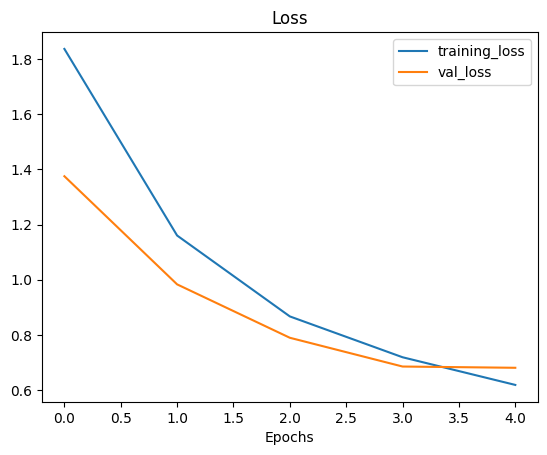

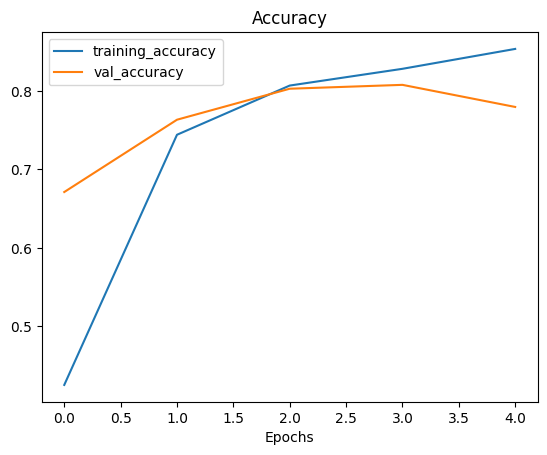

In [153]:
# Check out our model's loss curve
plot_loss_curves(history_model_0)

## Getting a feature vector from a trained model

- Tensor shape after passing through `base_model` is (None,7,7,1280) 4D
- Tensor shape after passing through `GlobalAveragePooling2D` is (None,1280) 2D

Let's use a similar shaped tensoe(1,4,4,3) and pass it through GlobalAveragePooling2D and see what happends

In [157]:
# Define the input shape
input_shape=(1,4,4,3)

# Create a random tensor
tf.random.set_seed(0)
input_tensor=tf.random.normal(shape=input_shape)

print(f'Random input tensor:{input_tensor.shape} \n{input_tensor}')

# Pass the random tensor through global average pooling layer
global_average_pooled_tensor=tf.keras.layers.GlobalAveragePooling2D()(input_tensor)

print(f"\nGlabal average pooled tensor:{global_average_pooled_tensor.shape} \n{global_average_pooled_tensor}")

Random input tensor:(1, 4, 4, 3) 
[[[[ 1.5110626   0.42292204 -0.41969493]
   [-1.0360372  -1.2368279   0.47027302]
   [-0.01397489  1.1888583   0.60253334]
   [ 0.5997111  -0.7057119  -0.43297544]]

  [[ 0.7936245  -0.6974926  -0.9598332 ]
   [-0.9006969  -0.36081055 -0.22377317]
   [ 0.30383846  0.52152544  0.1554326 ]
   [ 1.5885501  -0.7958055   0.07794423]]

  [[-0.17937538 -0.85996604  0.21930954]
   [ 0.71412295 -2.4445748   0.0267799 ]
   [ 1.7339767  -0.711038    0.9271697 ]
   [ 1.2675381  -1.8817257   0.23369555]]

  [[-0.11667551  1.0277894   0.32790193]
   [ 0.26553428 -1.3359481  -1.6940202 ]
   [-0.21031012 -1.8462374   0.16966769]
   [ 0.08540594 -1.4293113  -2.0325787 ]]]]

Glabal average pooled tensor:(1, 3) 
[[ 0.40039346 -0.6965221  -0.15951051]]


### Replicating global average pooling

In [158]:
import numpy as np

In [193]:
np.mean(input_tensor[0][0], axis=0)

array([ 0.26519042, -0.08268987,  0.055034  ], dtype=float32)

In [194]:
t=[]

for i in input_tensor[0]:
    t.append(np.mean(i, axis=0))

np.mean(t, axis=0)



array([ 0.40039343, -0.6965221 , -0.15951051], dtype=float32)

In [204]:
tf.reduce_mean(input_tensor, axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[ 0.40039346, -0.6965221 , -0.15951051]], dtype=float32)>

### Replicating global max pooling

In [205]:
# Pass input tensor through global max pooling layer
global_max_pooled_tensor=tf.keras.layers.GlobalMaxPooling2D()(input_tensor)

print(f'Global max pooled tensor:{global_max_pooled_tensor.shape}\n{global_max_pooled_tensor}')

Global max pooled tensor:(1, 3)
[[1.7339767 1.1888583 0.9271697]]


In [209]:
tf.reduce_max(input_tensor, axis=[1,2])


<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[1.7339767, 1.1888583, 0.9271697]], dtype=float32)>

In [214]:
t=[]

for i in input_tensor[0]:
    t.append(np.max(i, axis=0))

np.max(t, axis=0)



array([1.7339767, 1.1888583, 0.9271697], dtype=float32)

## Running a series of transfer learning experiments

>`model_0`:
> - Data: 10%
> - Prepeocessing: None
> - Model: Feature Extractor

>`model_1`
>- Data: 1%
>- Preprocessing: Data Augmentation
>- Model: Feature Extractor

>`model_2`
>- Data: 10%
>- Preprocessing: Data Augmentation
>- Model: Feature Extractor

>`model_3`
>- Data: 10%
>- Preprocessing: Data Augmentation
>- Model: Fine-tuning

>`model_4`
>- Data: 100%
>- Preprocessing: Data Augmentation
>- Model: Fine-tuning

## Getting and preprocessing data for model_1

In [220]:
# Download  1% data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip



--2024-08-20 09:50:11--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.1.27, 172.217.165.27, 142.251.41.59, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.1.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   583KB/s    in 3m 46s  

2024-08-20 09:53:59 (578 KB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [221]:
# Unzipping the data
unzip_data('10_food_classes_1_percent.zip')

In [229]:
# Setting train and test directories
train_dir_1_percent='10_food_classes_1_percent/train'
test_dir='10_food_classes_1_percent/test'

In [230]:
# Walk through the dirs
import os 

for dirpath, dirnames, filenames in os.walk('10_food_classes_1_percent'):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

There are 2 directories and 0 images in 10_food_classes_1_percent
There are 10 directories and 0 images in 10_food_classes_1_percent/test
There are 0 directories and 250 images in 10_food_classes_1_percent/test/fried_rice
There are 0 directories and 250 images in 10_food_classes_1_percent/test/hamburger
There are 0 directories and 250 images in 10_food_classes_1_percent/test/ramen
There are 0 directories and 250 images in 10_food_classes_1_percent/test/pizza
There are 0 directories and 250 images in 10_food_classes_1_percent/test/sushi
There are 0 directories and 250 images in 10_food_classes_1_percent/test/chicken_curry
There are 0 directories and 250 images in 10_food_classes_1_percent/test/grilled_salmon
There are 0 directories and 250 images in 10_food_classes_1_percent/test/chicken_wings
There are 0 directories and 250 images in 10_food_classes_1_percent/test/steak
There are 0 directories and 250 images in 10_food_classes_1_percent/test/ice_cream
There are 10 directories and 0 ima

In [231]:
# Setup data loaders
IMAGE_SIZE=(224,224)

train_data_1_percent=image_dataset_from_directory(directory=train_dir_1_percent,
                                                 image_size=IMAGE_SIZE,
                                                 label_mode='categorical')

test_data=image_dataset_from_directory(directory=test_dir,
                                      image_size=IMAGE_SIZE,
                                      label_mode='categorical')

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


## Adding data augmentation right into the model

We can see the benefits of doing this within the TensorFlow Data augmentation documentation: https://www.tensorflow.org/tutorials/images/data_augmentation#use_keras_preprocessing_layers

Off the top our of heads, after reading the docs, the benefits of using data augmentation inside the model are:

- Preprocessing of imges (augmenting them) happens on the GPU (much faster) rather than the CPU.
- Iamge data augmentation only happens during training, so we can still export our whole model and use it elsewhere.

In [236]:
base_model.layers[1]

<Rescaling name=rescaling_41, built=True>

In [377]:
# Create data augmentation stage
data_augmentation=tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal', name='random_flip_augmentation'),
    tf.keras.layers.RandomRotation(0.2, name='random_rotation__augmentation'),
    tf.keras.layers.RandomZoom(0.2, name='random_zoom_augmentation'),
    #tf.keras.layers.RandomHeight(0.2, name='random_height_augmentation'),
    #tf.keras.layers.RandomWidth(0.2, name='random_width_augmentation'),
    #tf.keras.layers.Rescaling(1/255.) # EfficientNetB0 already have rescaling built in 
], name='data_augmentation')



### Visualize our data augmentation layer and see what happens to our data


10_food_classes_1_percent/train/pizza/1916846.jpg


Text(0.5, 1.0, 'Augmented random image from class: pizza\n Shape: (412, 459, 3)')

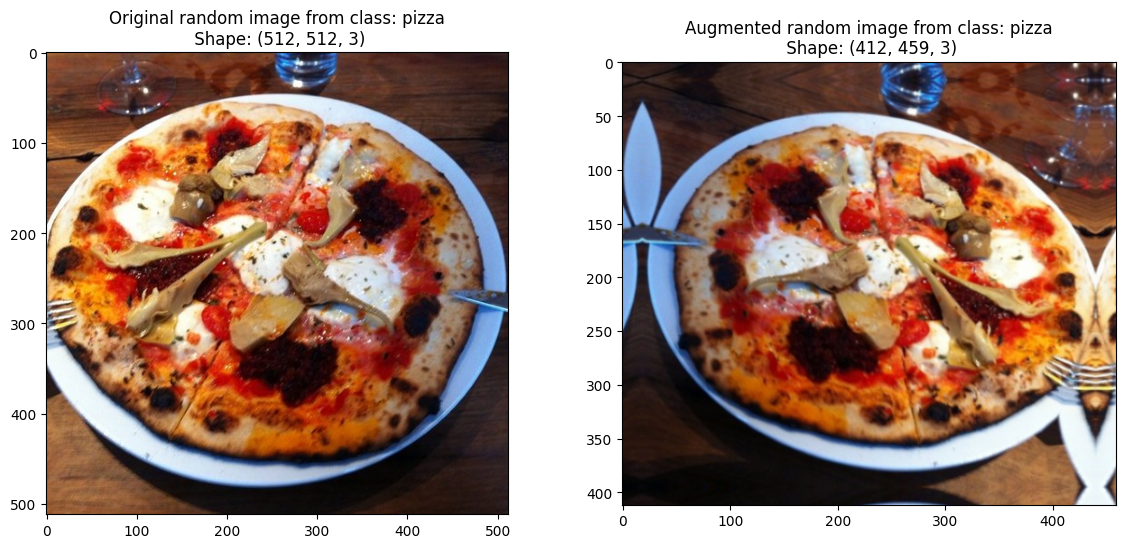

In [317]:
# View a random image and compare it to its augmented version
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
import os
import random

target_class=random.choice(train_data_1_percent.class_names)
#print(target_class)

target_dir='10_food_classes_1_percent/train/' + target_class
#print(target_dir)

random_image=random.choice(os.listdir(target_dir))
#print(random_image)

random_image_path=target_dir + '/' + random_image
print(random_image_path)

# Read in and plot random image
img=plt.imread(random_image_path)
#print(img.shape)

plt.figure(figsize=(14,6))

plt.subplot(121)
plt.imshow(img)
plt.title(f'Original random image from class: {target_class}\n Shape: {img.shape}')

# Plotting our augmented random image
augmented_img=data_augmentation(img)

plt.subplot(122)
plt.imshow(augmented_img/255.)
plt.title(f'Augmented random image from class: {target_class}\n Shape: {augmented_img.shape}')



In [241]:
train_dir_1_percent

'10_food_classes_1_percent/train'

In [242]:
train_data_1_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [247]:
random.choice(train_data_1_percent.class_names)

'sushi'

In [251]:
os.listdir(target_dir)

['3047807.jpg',
 '3653129.jpg',
 '2832499.jpg',
 '60633.jpg',
 '3621464.jpg',
 '612551.jpg',
 '1445352.jpg']

In [252]:
random.choice(os.listdir(target_dir))

'3047807.jpg'

In [296]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

## model_1
- Data: 1%
- Preprocessing: Data Augmentation
- Model: Feature Extractor


In [397]:
# Create input layer
input_shape=IMAGE_SIZE+(3,)
inputs=tf.keras.layers.Input(shape=(224,224,3), name='input_layer')

# Createbase model, remove top layer, freeze base model layers
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

# Add in data augmentation sequential model as a layer
x= data_augmentation(inputs)

# Give base model the inputs (after augmentation) and don't train it
x= base_model(x, training=False) # As the same we have freezen the layers before

# Pool output features of the base model (to condense features)
x= tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)

# Put a dense layer on as the output (converting to feature vectore)
outputs= tf.keras.layers.Dense(10, activation='softmax', name='output_layer')(x)

# Make a model using inputs and outputs
model_1=tf.keras.Model(inputs, outputs)

# Compile the model
model_1.compile(optimizer=tf.keras.optimizers.Adam(),
               loss=tf.keras.losses.CategoricalCrossentropy(),
               metrics=['accuracy'])

history_model_1= model_1.fit(train_data_1_percent,
                            epochs=5,
                            #steps_per_epoch= None,
                            validation_data= test_data,
                            validation_steps= int(0.25 * len(test_data)),
                            # Track model training logs
                            callbacks=[create_tensorboard_callback(dir_name='transfer_learning',
                                                                  experiment_name='model_1')])

Saving TensorBoard log files to: transfer_learning/model_1/20240820-202741
Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 55s 19s/step - accuracy: 0.0787 - loss: 2.3778 - val_accuracy: 0.1842 - val_loss: 2.2152
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 44s 21s/step - accuracy: 0.3277 - loss: 2.0658 - val_accuracy: 0.2615 - val_loss: 2.0934
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 74s 17s/step - accuracy: 0.4057 - loss: 1.9061 - val_accuracy: 0.3339 - val_loss: 1.9918
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 45s 19s/step - accuracy: 0.4655 - loss: 1.8159 - val_accuracy: 0.4128 - val_loss: 1.9065
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.5969 - loss: 1.6865 - val_accuracy: 0.3971 - val_loss: 1.8053


2024-08-20 20:31:28.590664: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/

In [319]:
IMAGE_SIZE+(3,)

(224, 224, 3)

In [343]:
len(train_data_1_percent)

3

In [352]:
70/32

2.1875

In [354]:
 np.ceil(70/32)

3.0

In [379]:
# Evaluate on the full test datast
model_1.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.3971 - loss: 1.8964


[1.8950837850570679, 0.39800000190734863]

In [398]:
model_1.summary()

Model: "functional_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_8 (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling_layer    │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,088,003 (15.59 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

 Optimizer params: 25,622 (100.09 KB)

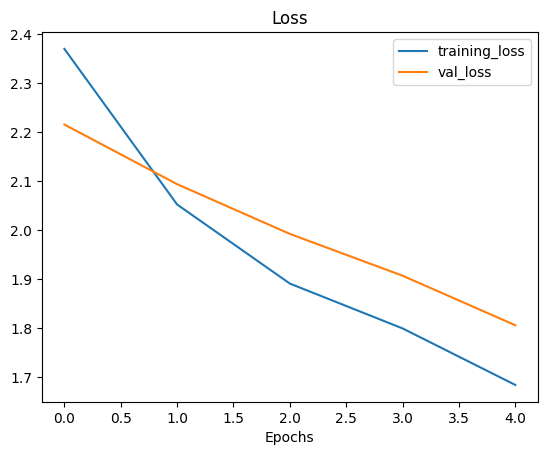

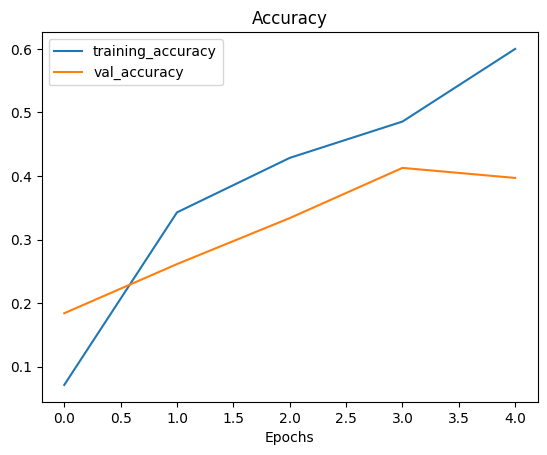

In [399]:
plot_loss_curves(history_model_1)

## model_2
- Data: 10%
- Preprocessing: Data Augmentation
- Model: Feature Extractor


In [382]:
# Get the 10 food classes 10 percent data and setup dataset directories
# We already have the data

train_dir_10_percent='10_food_classes_10_percent/train'
test_dir='10_food_classes_10_percent/test'


In [383]:
# Setup data inputs
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

IMAGE_SIZE=(224,224)

train_data_10_percent=image_dataset_from_directory(directory=train_dir_10_percent,
                                                  label_mode='categorical',
                                                  image_size=IMAGE_SIZE)

test_data=image_dataset_from_directory(directory=test_dir,
                                      label_mode='categorical',
                                      image_size=IMAGE_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [384]:
# Walk through directories
walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/tes

In [385]:
data_augmentation.summary()

Model: "data_augmentation"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_augmentation        │ (None, 224, 224, 3)    │             0 │
│ (RandomFlip)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation__augmentation   │ (None, 224, 224, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_augmentation        │ (None, 224, 224, 3)    │             0 │
│ (RandomZoom)                    │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [416]:
# Build data augmentation layer
data_augmentation=tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    #tf.keras.layers.Rescaling(1/255.) # EfficientNet already has a buit in rescale layer in its own
], name='data_augmentation_layer')

# Setup the input shape to our model
input_shape=(224,224,3)

# Create frozen base model (also called backbone)
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False


# Create the inputs and outputs including layers in between
inputs=tf.keras.layers.Input(shape=input_shape, name='input_layer')
x= data_augmentation(inputs, ) # Augment our training data (augmentation doesn't occur on the test data )
x= base_model(x , training=False) # Pass augmented image to base model but keep it in inference mode, this also insures batchnoem layer doesn't get updated
x= tf.keras.layers.GlobalAvgPool2D(name='global_average_pooling_layer')(x)
outputs= tf.keras.layers.Dense(10, activation='softmax', name='output_layer')(x)
model_2=tf.keras.Model(inputs,outputs)

# Compile
model_2.compile(optimizer=tf.keras.optimizers.Adam(),
               loss=tf.keras.losses.CategoricalCrossentropy(),
               metrics=['accuracy'])

# Fit
# history_model_2= model_2.fit(train_data_10_percent,
#                             epochs=5,
#                             validation_data=test_data,
#                             validation_steps= int(0.25 * len(test_data))
#                             callbacks=[create_tensorboard_callback(dir_name='transfer_learning',
#                                                                   experiment_name='model_2')])


In [417]:
data_augmentation.summary()

Model: "data_augmentation_layer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_15 (RandomFlip)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_15              │ (None, 224, 224, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_15 (RandomZoom)     │ (None, 224, 224, 3)    │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [418]:
model_2.summary()

Model: "functional_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation_layer         │ (None, 224, 224, 3)    │             0 │
│ (Sequential)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling_layer    │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,062,381 (15.50 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

### Creating a model checkpoint callback

The ModelCheckpoint callback intermediately saves our model (the full model or just the weights) during training. This is useful so we can come and start where we left off.

In [552]:
# Set checkpoint path
checkpoint_path='checkpoints/checkpoints_weights_model_2/checkpoint.weights.h5'

# Create a model checkpoint callback that saves the model's weights only
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                      save_best_only=False,
                                                      save_weights_only=True,
                                                      save_freq='epoch', # Save every epoch
                                                      verbose=1)

In [429]:
# Fit the model saving checkpoints every epoch
initial_epochs=5
history_model_2= model_2.fit(train_data_10_percent,
                            epochs=initial_epochs,
                            validation_data=test_data,
                            validation_steps= int(0.25 * len(test_data)),
                            callbacks=[create_tensorboard_callback(dir_name='transfer_learning',
                                                                  experiment_name='model_2'),
                                      checkpoint_callback])



Saving TensorBoard log files to: transfer_learning/model_2/20240821-075730
Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1829 - loss: 2.2192
Epoch 1: saving model to checkpoints_weights_10_percent_model/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 91s 3s/step - accuracy: 0.1865 - loss: 2.2133 - val_accuracy: 0.5674 - val_loss: 1.6009
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5850 - loss: 1.5646
Epoch 2: saving model to checkpoints_weights_10_percent_model/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - accuracy: 0.5858 - loss: 1.5612 - val_accuracy: 0.7023 - val_loss: 1.2029
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7084 - loss: 1.2219
Epoch 3: saving model to checkpoints_weights_10_percent_model/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 139s 3s/step - accuracy: 0.7080 - loss: 1.2205 - val_accuracy: 0.7697 - val_loss: 0.9522
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7462 - loss: 1.0182

/usr/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


24/24 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.7442 - loss: 0.9329 - val_accuracy: 0.8382 - val_loss: 0.6569


In [431]:
results_model_0= model_0.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.8131 - loss: 0.6553


In [432]:
results_model_1= model_1.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.4470 - loss: 1.8363


In [433]:
results_model_2= model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.7933 - loss: 0.7701


(0.24508824199438095, 0.8664804175496101)


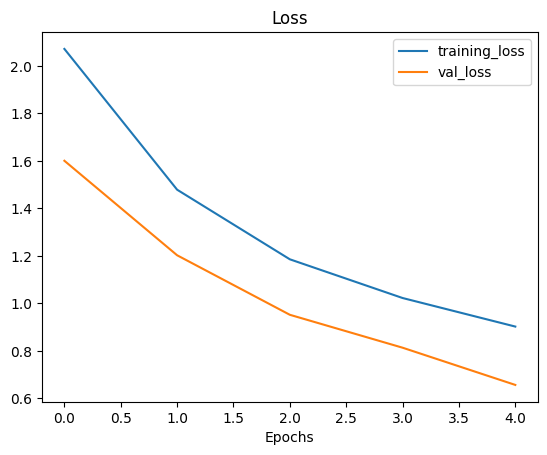

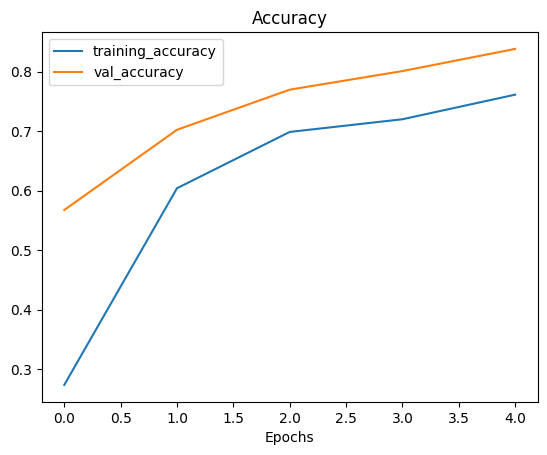

In [576]:
# Plot the loss curves
plot_loss_curves(history_model_2)
print(plt.ylim())

### Loading in checkpointed weights

 Loading in checkpointed weights returns a model to a specific checkpoint

In [436]:
model_2.load_weights(checkpoint_path)

In [437]:
results_model_2_loaded_weights= model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.7926 - loss: 0.7677


In [442]:
model_2.metrics_names

['loss', 'compile_metrics']

In [443]:
results_model_2

[0.7702385187149048, 0.7943999767303467]

In [444]:
results_model_2_loaded_weights

[0.7702386379241943, 0.7943999767303467]

In [445]:
results_model_2==results_model_2_loaded_weights

False

In [448]:
# Check if the results are close together
import numpy as np
np.isclose(results_model_2, results_model_2_loaded_weights)

array([ True,  True])

In [452]:
# Check the difference
np.array(results_model_2)- np.array(results_model_2_loaded_weights)

array([-1.1920929e-07,  0.0000000e+00])

## Model3: Fine-tuning an existing model on 10% of data

>- Data: 10%
>- Preprocessing: Data Augmentation
>- Model: Fine Tuning

**Note:** Fine-tuning usually work best after training a feature extraction model for a few epochs with large amounts of custom data

In [453]:
model_2.layers

[<InputLayer name=input_layer, built=True>,
 <Sequential name=data_augmentation_layer, built=True>,
 <Functional name=efficientnetb0, built=True>,
 <GlobalAveragePooling2D name=global_average_pooling_layer, built=True>,
 <Dense name=output_layer, built=True>]

In [454]:
for layer in model_2.layers:
    print(layer, layer.trainable)

<InputLayer name=input_layer, built=True> True
<Sequential name=data_augmentation_layer, built=True> True
<Functional name=efficientnetb0, built=True> False
<GlobalAveragePooling2D name=global_average_pooling_layer, built=True> True
<Dense name=output_layer, built=True> True


In [463]:
model_2.layers[1].layers

[<RandomFlip name=random_flip_15, built=True>,
 <RandomRotation name=random_rotation_15, built=True>,
 <RandomZoom name=random_zoom_15, built=True>]

In [472]:
non_trainable_number=0

for i,layer in enumerate(model_2.layers[2].layers):
    print(i, ') ', layer.name, '|', 'Trainable:', layer.trainable)
    if layer.trainable==False:
        non_trainable_number+=1
        
print('\nNon trainable number: ',non_trainable_number)

0 )  input_layer_91 | Trainable: False
1 )  rescaling_136 | Trainable: False
2 )  normalization_67 | Trainable: False
3 )  rescaling_137 | Trainable: False
4 )  stem_conv_pad | Trainable: False
5 )  stem_conv | Trainable: False
6 )  stem_bn | Trainable: False
7 )  stem_activation | Trainable: False
8 )  block1a_dwconv | Trainable: False
9 )  block1a_bn | Trainable: False
10 )  block1a_activation | Trainable: False
11 )  block1a_se_squeeze | Trainable: False
12 )  block1a_se_reshape | Trainable: False
13 )  block1a_se_reduce | Trainable: False
14 )  block1a_se_expand | Trainable: False
15 )  block1a_se_excite | Trainable: False
16 )  block1a_project_conv | Trainable: False
17 )  block1a_project_bn | Trainable: False
18 )  block2a_expand_conv | Trainable: False
19 )  block2a_expand_bn | Trainable: False
20 )  block2a_expand_activation | Trainable: False
21 )  block2a_dwconv_pad | Trainable: False
22 )  block2a_dwconv | Trainable: False
23 )  block2a_bn | Trainable: False
24 )  block2a_ac

In [516]:
# Freeze our base model layers 
base_model.trainable=False

# Disable the trainable every layer in base model
for layer in base_model.layers:
    layer.trainable=False

# Recompile (we have to recompile our models every time we make a change)
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=[tf.keras.metrics.Accuracy])



In [517]:
len(model_2.layers[2].trainable_variables)

0

In [519]:
len(model_2.trainable_variables)

2

In [522]:
for layer in model_2.layers:
    print(layer.name, layer.trainable)

input_layer True
data_augmentation_layer True
efficientnetb0 False
global_average_pooling_layer True
output_layer True


In [523]:
for layer in model_2.layers[2].layers:
        print(layer.name, layer.trainable)

input_layer_91 False
rescaling_136 False
normalization_67 False
rescaling_137 False
stem_conv_pad False
stem_conv False
stem_bn False
stem_activation False
block1a_dwconv False
block1a_bn False
block1a_activation False
block1a_se_squeeze False
block1a_se_reshape False
block1a_se_reduce False
block1a_se_expand False
block1a_se_excite False
block1a_project_conv False
block1a_project_bn False
block2a_expand_conv False
block2a_expand_bn False
block2a_expand_activation False
block2a_dwconv_pad False
block2a_dwconv False
block2a_bn False
block2a_activation False
block2a_se_squeeze False
block2a_se_reshape False
block2a_se_reduce False
block2a_se_expand False
block2a_se_excite False
block2a_project_conv False
block2a_project_bn False
block2b_expand_conv False
block2b_expand_bn False
block2b_expand_activation False
block2b_dwconv False
block2b_bn False
block2b_activation False
block2b_se_squeeze False
block2b_se_reshape False
block2b_se_reduce False
block2b_se_expand False
block2b_se_excite Fa

In [479]:
a=[]
for i in range(1,11):
    a.append(i)

In [480]:
a

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [484]:
a[:-5]

[1, 2, 3, 4, 5]

In [485]:
a[-5:]

[6, 7, 8, 9, 10]

In [557]:
# Freeze our base model layers except for the last 10
base_model.trainable=False

for layer in base_model.layers[-10:]:
    layer.trainable=True

# Recompile (we have to recompile our models every time we make a change)
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # when fine-tuning you typically want to lower the learning rate by 10x
               metrics=['accuracy'])


>🔑 **Note:** When using fine-tuning it's best practice to lower your learning rate by some amount. How much? This is a hyperparameter you can tune. But a good rule of thumb is at least 10x (though different sources will claim other values). A good resource for information on this is the ULMFiT paper: https://arxiv.org/abs/1801.06146

In [531]:
for i, layer in enumerate(model_2.layers):
    print(i, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation_layer True
2 efficientnetb0 False
3 global_average_pooling_layer True
4 output_layer True


In [532]:
# Check out which layer is trainable
for i, layer in enumerate(model_2.layers[2].layers):
    print(i, layer.name, layer.trainable)

0 input_layer_91 False
1 rescaling_136 False
2 normalization_67 False
3 rescaling_137 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_

In [493]:
# Check out number of trainable layers
model_2.layers[2].trainable_variables

[]

In [495]:
len(model_2.trainable_variables)

12

In [538]:
model_2.trainable_weights

[<KerasVariable shape=(1, 1, 1152, 48), dtype=float32, path=block7a_se_reduce/kernel>,
 <KerasVariable shape=(48,), dtype=float32, path=block7a_se_reduce/bias>,
 <KerasVariable shape=(1, 1, 48, 1152), dtype=float32, path=block7a_se_expand/kernel>,
 <KerasVariable shape=(1152,), dtype=float32, path=block7a_se_expand/bias>,
 <KerasVariable shape=(1, 1, 1152, 320), dtype=float32, path=block7a_project_conv/kernel>,
 <KerasVariable shape=(320,), dtype=float32, path=block7a_project_bn/gamma>,
 <KerasVariable shape=(320,), dtype=float32, path=block7a_project_bn/beta>,
 <KerasVariable shape=(1, 1, 320, 1280), dtype=float32, path=top_conv/kernel>,
 <KerasVariable shape=(1280,), dtype=float32, path=top_bn/gamma>,
 <KerasVariable shape=(1280,), dtype=float32, path=top_bn/beta>,
 <KerasVariable shape=(1280, 10), dtype=float32, path=output_layer/kernel>,
 <KerasVariable shape=(10,), dtype=float32, path=output_layer/bias>]

In [537]:
model_2.trainable_variables

[<KerasVariable shape=(1, 1, 1152, 48), dtype=float32, path=block7a_se_reduce/kernel>,
 <KerasVariable shape=(48,), dtype=float32, path=block7a_se_reduce/bias>,
 <KerasVariable shape=(1, 1, 48, 1152), dtype=float32, path=block7a_se_expand/kernel>,
 <KerasVariable shape=(1152,), dtype=float32, path=block7a_se_expand/bias>,
 <KerasVariable shape=(1, 1, 1152, 320), dtype=float32, path=block7a_project_conv/kernel>,
 <KerasVariable shape=(320,), dtype=float32, path=block7a_project_bn/gamma>,
 <KerasVariable shape=(320,), dtype=float32, path=block7a_project_bn/beta>,
 <KerasVariable shape=(1, 1, 320, 1280), dtype=float32, path=top_conv/kernel>,
 <KerasVariable shape=(1280,), dtype=float32, path=top_bn/gamma>,
 <KerasVariable shape=(1280,), dtype=float32, path=top_bn/beta>,
 <KerasVariable shape=(1280, 10), dtype=float32, path=output_layer/kernel>,
 <KerasVariable shape=(10,), dtype=float32, path=output_layer/bias>]

In [556]:
# Set checkpoint path
checkpoint_path='checkpoints/checkpoints_weights_model_2_finetuned/checkpoint.keras'

# Create a model checkpoint callback that saves the model's weights only
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                      save_best_only=True,
                                                      save_weights_only=False,
                                                      save_freq='epoch', # Save every epoch
                                                      verbose=1)

In [558]:
# Fine tune for another 5 epochs
fine_tune_epochs=initial_epochs + 5

# Refit the model (same as model 2 except with more trainable layers)
history_model_2_finetune=model_2.fit(train_data_10_percent,
                                    epochs=fine_tune_epochs,
                                    validation_data=test_data,
                                    validation_steps=int(0.25 * len(test_data)),
                                    callbacks=[create_tensorboard_callback(dir_name='transfer_learning',
                                                                          experiment_name='model_2_finetuned'),
                                              checkpoint_callback],
                                    initial_epoch=history_model_2.epoch[-1] # start training from previous last epoch
                                    )

Saving TensorBoard log files to: transfer_learning/model_2_finetuning/20240821-134922
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8167 - loss: 0.7890
Epoch 5: val_loss improved from inf to 0.58015, saving model to checkpoints/checkpoints_weights_model_2_finetune/checkpoint.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 108s 4s/step - accuracy: 0.8166 - loss: 0.7886 - val_accuracy: 0.8306 - val_loss: 0.5801
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8758 - loss: 0.6493
Epoch 6: val_loss did not improve from 0.58015
24/24 ━━━━━━━━━━━━━━━━━━━━ 134s 4s/step - accuracy: 0.8751 - loss: 0.6496 - val_accuracy: 0.7993 - val_loss: 0.6243
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8403 - loss: 0.6071
Epoch 7: val_loss improved from 0.58015 to 0.51360, saving model to checkpoints/checkpoints_weights_model_2_finetune/checkpoint.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 144s 4s/step - accuracy: 0.8406 - loss: 0.6066 - val_accuracy: 0.8520 - val_loss: 0.5136
Epoch 

/usr/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8993 - loss: 0.4241
Epoch 10: val_loss did not improve from 0.41908
24/24 ━━━━━━━━━━━━━━━━━━━━ 90s 4s/step - accuracy: 0.8988 - loss: 0.4256 - val_accuracy: 0.8553 - val_loss: 0.4606


In [543]:
initial_epochs

5

In [550]:
history_model_2.epoch

[0, 1, 2, 3, 4]

In [551]:
history_model_2.epoch[-1]

4

In [612]:
results_model_2_finetune= model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.8489 - loss: 0.4559


In [560]:
results_model_2

[0.7702385187149048, 0.7943999767303467]

In [565]:
model_2.metrics_names

['loss', 'compile_metrics']

In [567]:
model_2.metrics

[<Mean name=loss>, <CompileMetrics name=compile_metrics>]

(0.7949092000722885, 0.8924329072237015)


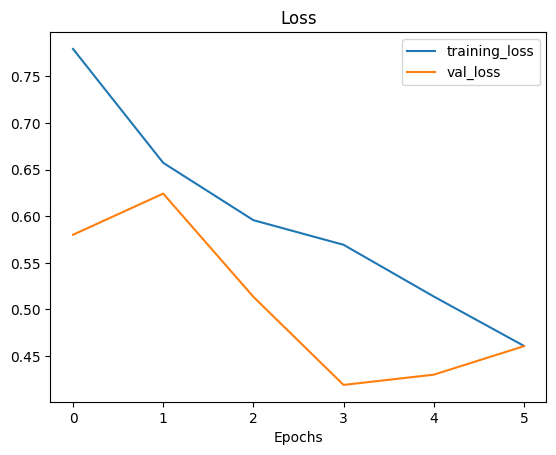

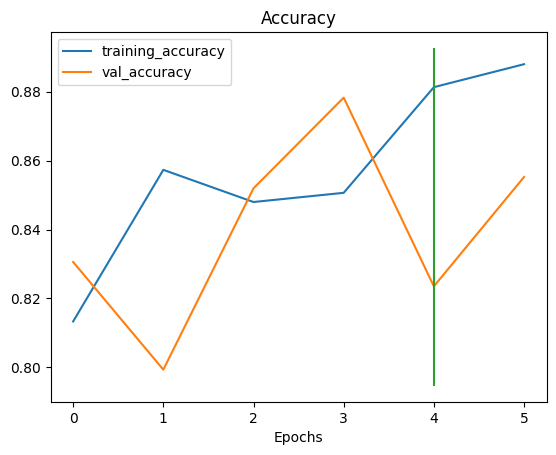

In [580]:
plot_loss_curves(history_model_2_finetune)
print(plt.ylim())
plt.plot([initial_epochs-1,initial_epochs-1],plt.ylim())

In [596]:
# Creating function to compare loss curves bafore and after fine tining
def compare_history(original_history, new_history, initial_epoch=5):
    total_acc= original_history.history['accuracy']+new_history.history['accuracy']
    total_loss=original_history.history['loss']+new_history.history['loss']
    
    total_val_acc= original_history.history['val_accuracy']+new_history.history['val_accuracy']
    total_val_loss=original_history.history['val_loss']+new_history.history['val_loss']
   
    plt.figure(figsize=(8,8))
    plt.subplot(211)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epoch-1, initial_epoch-1], plt.ylim(), label='Start Fine Tuning')
    plt.legend()
    plt.title('Traning and Validation Accuracy')
    
    plt.figure(figsize=(8,8))
    plt.subplot(212)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epoch-1, initial_epoch-1], plt.ylim(), label='Start Fine Tuning')
    plt.legend()
    plt.title('Traning and Validation Loss')

In [597]:
history_model_2.history['accuracy']

[0.273333340883255,
 0.6039999723434448,
 0.6986666917800903,
 0.7200000286102295,
 0.7613333463668823]

In [598]:
history_model_2_finetune.history['accuracy']

[0.8133333325386047,
 0.8573333621025085,
 0.8479999899864197,
 0.8506666421890259,
 0.8813333511352539,
 0.8880000114440918]

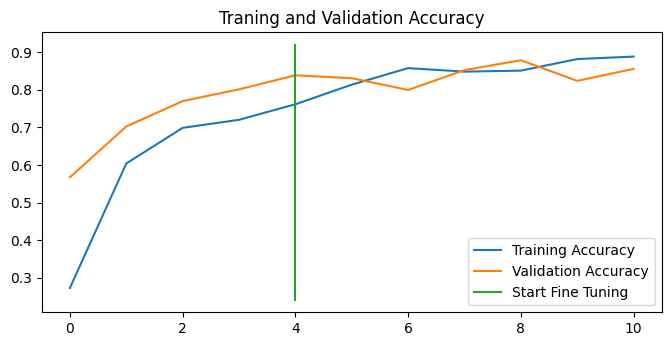

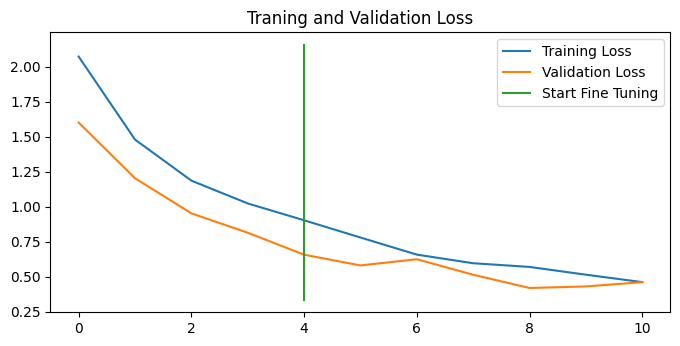

In [599]:
compare_history(history_model_2,history_model_2_finetune)

## Model 4: Fine-tuning an existing model on all of the data

>- Data: 100%
>- Preprocessing: Data Augmentation
>- Model: Fine Tuning



In [600]:
#!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

In [607]:
# Setup training and test dirs
train_dir_all_data='10_food_classes_all_data/train'
test_dir='10_food_classes_all_data/test'

In [608]:
walk_through_dir('10_food_classes_all_data')

There are 1 directories and 0 images in '10_food_classes_all_data'.
There are 2 directories and 0 images in '10_food_classes_all_data/10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/10_food_classes_all

In [611]:
# Setup datasets
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
IMAGE_SIZE=(224,224)

train_data_all_data=image_dataset_from_directory(directory=train_dir_all_data,
                                                image_size=IMAGE_SIZE,
                                                label_mode='categorical')

test_data=image_dataset_from_directory(directory=test_dir,
                                      label_mode='categorical',
                                      image_size=IMAGE_SIZE)


Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


#### To train a fine-tuning model (model_4) we need to revert model_2 back to its feature extraction weights 

In [613]:
checkpoint_path

'checkpoints/checkpoints_weights_model_2_finetune/checkpoint.keras'

In [615]:
model_2.load_weights(checkpoint_path)

In [616]:
model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.8511 - loss: 0.4753


[0.4777945280075073, 0.8543999791145325]

In [619]:
results_model_2_finetune

[0.4433429539203644, 0.8592000007629395]

In [631]:
# Load weights from checkpoint, that way we can fine-tune from 
# the same stage the 10 percent data model was fine-tuned from
checkpoint_path='checkpoints/checkpoints_weights_model_2/checkpoint.weights.h5'

model_2.load_weights(checkpoint_path)

In [634]:
model_2.optimizer


In [625]:
checkpoint_path

'checkpoints/checkpoints_weights_model_2/checkpoint.weights.h5'

In [622]:
model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step - accuracy: 0.7704 - loss: 0.8347


[0.8324364423751831, 0.7680000066757202]

In [623]:
results_model_2

[0.7702385187149048, 0.7943999767303467]

In [627]:
for i, layer in enumerate(model_2.layers):
    print(i, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation_layer True
2 efficientnetb0 False
3 global_average_pooling_layer True
4 output_layer True


In [628]:
for i, layer in enumerate(model_2.layers[2].layers):
    print(i, layer.name, layer.trainable)

0 input_layer_91 False
1 rescaling_136 False
2 normalization_67 False
3 rescaling_137 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_

In [635]:
# Compile
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
               metrics=['accuracy'])

In [642]:
checkpoint_path='checkpoints/checkpoints_weights_model_2_finetuned_alldata/checkpoint.weights.h5'


checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                      save_best_only=False,
                                                      save_weights_only=True,
                                                      verbose=1)


In [644]:
print(checkpoint_path)

checkpoints/checkpoints_weights_model_2_finetuned_alldata/checkpoint.weights.h5


In [646]:
# Continue to train and fine-tune the model to our data (100% of training data)
fine_tune_epochs= initial_epochs + 5

history_model_2_finetune_alldata= model_2.fit(train_data_all_data,
                                             epochs= fine_tune_epochs,
                                             validation_data= test_data,
                                             validation_steps= int(0.25 * len(test_data)),
                                             callbacks=[create_tensorboard_callback(dir_name='transfer_learning',
                                                                                   experiment_name='model_2_finetuned_alldata'),
                                                       checkpoint_callback],
                                             initial_epoch=history_model_2.epoch[-1])

Saving TensorBoard log files to: transfer_learning/model_2_finetuned_alldata/20240821-174317
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7381 - loss: 0.9177
Epoch 5: saving model to checkpoints/checkpoints_weights_model_2_finetuned_alldata/checkpoint.weights.h5
235/235 ━━━━━━━━━━━━━━━━━━━━ 593s 2s/step - accuracy: 0.7382 - loss: 0.9172 - val_accuracy: 0.8783 - val_loss: 0.4056
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8143 - loss: 0.6038
Epoch 6: saving model to checkpoints/checkpoints_weights_model_2_finetuned_alldata/checkpoint.weights.h5
235/235 ━━━━━━━━━━━━━━━━━━━━ 635s 3s/step - accuracy: 0.8143 - loss: 0.6037 - val_accuracy: 0.9013 - val_loss: 0.2975
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8365 - loss: 0.5295
Epoch 7: saving model to checkpoints/checkpoints_weights_model_2_finetuned_alldata/checkpoint.weights.h5
235/235 ━━━━━━━━━━━━━━━━━━━━ 556s 2s/step - accuracy: 0.8365 - loss: 0.5295 - val_accuracy: 0.9161 - 

/usr/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


235/235 ━━━━━━━━━━━━━━━━━━━━ 496s 2s/step - accuracy: 0.8625 - loss: 0.4350 - val_accuracy: 0.9265 - val_loss: 0.3017
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8630 - loss: 0.4127
Epoch 10: saving model to checkpoints/checkpoints_weights_model_2_finetuned_alldata/checkpoint.weights.h5
235/235 ━━━━━━━━━━━━━━━━━━━━ 520s 2s/step - accuracy: 0.8630 - loss: 0.4126 - val_accuracy: 0.9128 - val_loss: 0.2736


In [637]:
fine_tune_epochs

10

In [638]:
initial_epochs

5

In [645]:
history_model_2.epoch

[0, 1, 2, 3, 4]

In [648]:
results_model_2_finetune_alldata=model_2.evaluate(test_data)
results_model_2_finetune_alldata

79/79 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.9158 - loss: 0.2571


[0.24967966973781586, 0.9187999963760376]

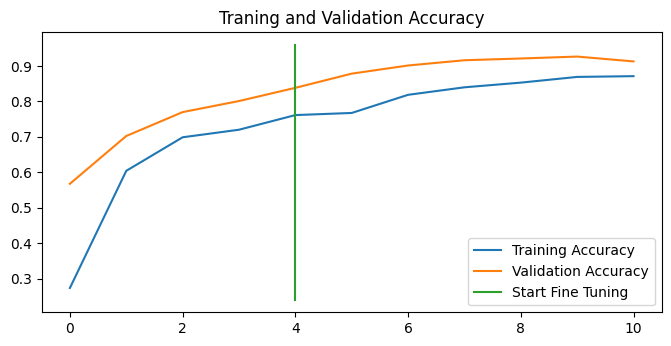

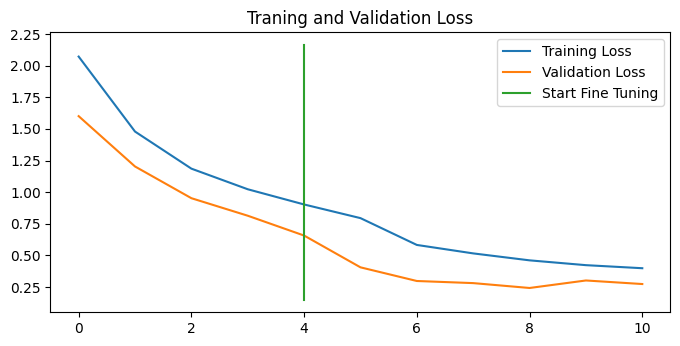

In [649]:
compare_history(history_model_2,history_model_2_finetune_alldata)

## Viewing our experiment data on TensorBoard

In [651]:
%load_ext tensorboard

In [653]:
%tensorboard --logdir ./transfer_learning/